### Image Histogram

An **image histogram** is a **graphical representation** of the **tonal(intensity) distribution** in a digital image. It shows how many pixels in an image fall into each possible intensity value.

---
## What does It represent?

### For **Grayscale Images**:
- **X-axis**: Pixel intensity values ranging from **0 (black)** to **255(white)**
- **Y-axis**: Number of pixels that have each intensity value

### For *Color Images**:
- Separate histograms for each **color channel**: Red, Green, and Blue (RGB)
- Each channel's histogram shows the intensity distribution within that specific color component

---


## 📊 Why Is It Useful?

An image histogram is a powerful diagnostic tool in image processing. It helps with:

- 🎯 **Brightness & Contrast Analysis**: Easily spot if the image is too dark, too bright, or washed out
- ✨ **Image Enhancement**: Techniques like **histogram equalization** can improve contrast
- 🧱 **Thresholding & Segmentation**: Choosing cutoffs for separating foreground/background
- 🧠 **Feature Extraction**: Often used in computer vision and machine learning as a compact representation of image characteristics

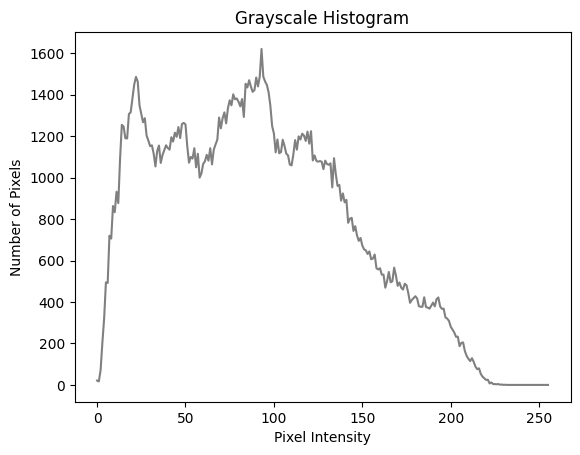

In [36]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('Color Riot', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()

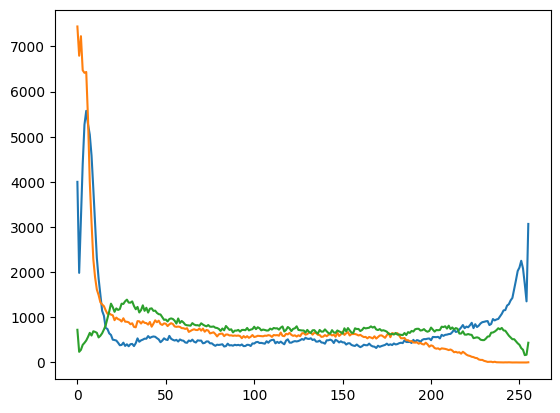

In [37]:
img = cv2.imread('img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

hist_red = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist_red)

hist_green = cv2.calcHist([img], [1], None, [256], [0, 256])
plt.plot(hist_green)

hist_blue = cv2.calcHist([img], [2], None, [256], [0, 256])
plt.plot(hist_blue)

## Syntax
- **cv2.calcHist(images, channels, mask, histSize, ranges)**

| Parameter  | Type                | Description                                                                                                                                   |
| ---------- | ------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| `images`   | List                | List containing the image(s). You must pass it in square brackets, even for a single image: `[img]`.                                          |
| `channels` | List                | Index of the channels to compute the histogram. For grayscale use `[0]`; for color images: `[0]` = Red, `[1]` = Green, `[2]` = Blue (if RGB). |
| `mask`     | NumPy array or None | Optional mask. If not `None`, histogram is computed only for the masked region.                                                               |
| `histSize` | List                | Number of bins. Typically `[256]` for 8-bit images (intensity values range from 0–255).                                                       |
| `ranges`   | List                | The range of intensity values to compute. Use `[0, 256]` to cover all 8-bit values.                                                           |


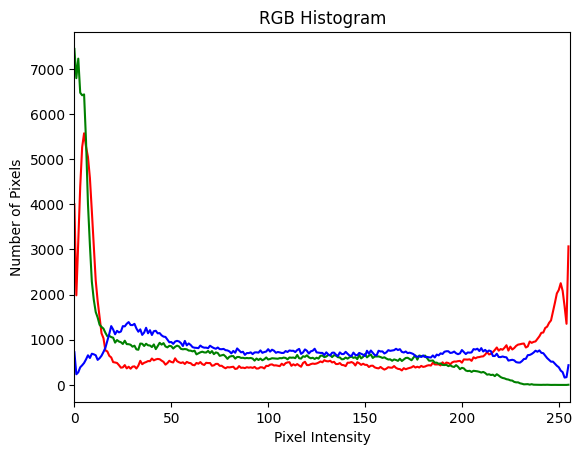

In [38]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

colors = ('r', 'g', 'b')
channel_ids = (0, 1, 2)

for channel_id, color in zip(channel_ids, colors):
    hist = cv2.calcHist([img], [channel_id], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.xlim([0, 256])
plt.show()


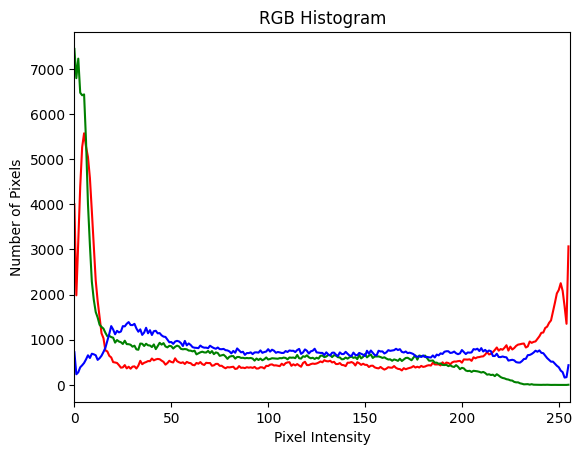

In [39]:
img = cv2.imread('img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

colors = ('r', 'g', 'b')
channel_ids = (0, 1, 2)

for channel_id, color in zip(channel_ids, colors):
  hist = cv2.calcHist([img], [channel_id], None, [256], [0, 256])
  plt.plot(hist, color=color)
  

plt.title('RGB Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.xlim([0, 256])
plt.show()

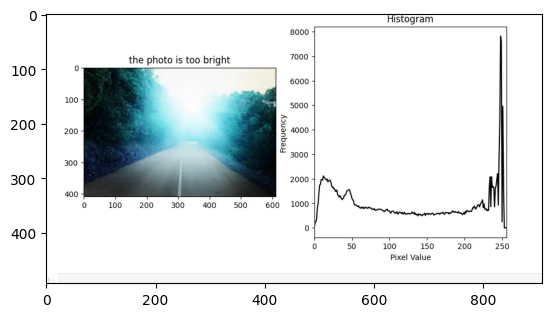

In [40]:
bright_image = cv2.imread('img2.jpg')
plt.imshow(bright_image)
plt.show()


# 📊 Understanding `plt.subplot()` in Matplotlib

`plt.subplot()` is a function from `matplotlib.pyplot` used to display **multiple plots** in a single figure by dividing the figure into a grid.

## 🧩 Syntax

```python
plt.subplot(nrows, ncols, index)
```

- **nrows**: Number of rows in the grid
- **ncols**: Number of columns in the grid
- **index**: Position of the subplot (starting from 1, left to right, top to bottom)

Alternatively:
```python
plt.subplot(231)  # Same as plt.subplot(2, 3, 1)
```

---

## 🧠 Parameters Explained

| Parameter | Description |
|-----------|-------------|
| `nrows`   | Total number of **rows** of subplots |
| `ncols`   | Total number of **columns** of subplots |
| `index`   | Index of the current subplot (starts from 1, not 0!) |

---

## 🔍 Example

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Top-left subplot
plt.subplot(2, 2, 1)
plt.title("Subplot 1")
plt.plot([1, 2, 3])

# Top-right subplot
plt.subplot(2, 2, 2)
plt.title("Subplot 2")
plt.plot([3, 2, 1])

# Bottom-left subplot
plt.subplot(2, 2, 3)
plt.title("Subplot 3")
plt.plot([1, 3, 2])

# Bottom-right subplot
plt.subplot(2, 2, 4)
plt.title("Subplot 4")
plt.plot([2, 1, 3])

plt.tight_layout()
plt.show()
```

---

## 🎯 Tips

- Always call `plt.figure()` before `plt.subplot()` to create a figure.
- Use `plt.tight_layout()` to auto-adjust spacing between subplots.
- Use `plt.subplots()` (note the "s") for an easier and cleaner API if working with many plots.



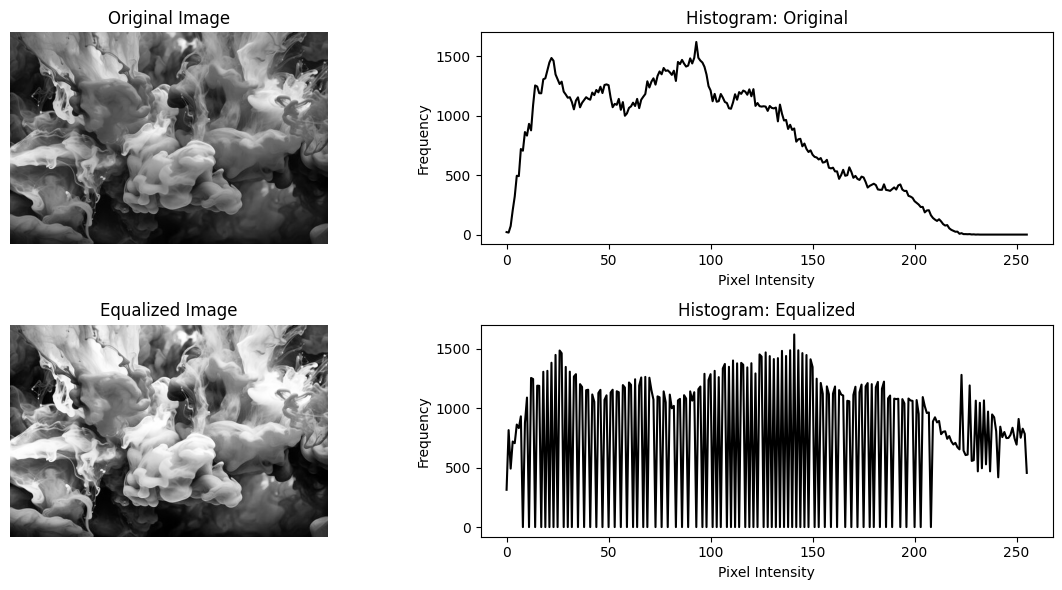

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)

# Calculate histograms
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Create subplots: 2 rows, 2 columns
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Histogram of Original
plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title("Histogram: Original")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

# Histogram of Equalized
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='black')
plt.title("Histogram: Equalized")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [42]:
img = cv2.imread('img1.jpg')
# print(img.shape[0], img.shape[1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
print(np.mean(img))

(360, 540, 3)
100.83845164609053


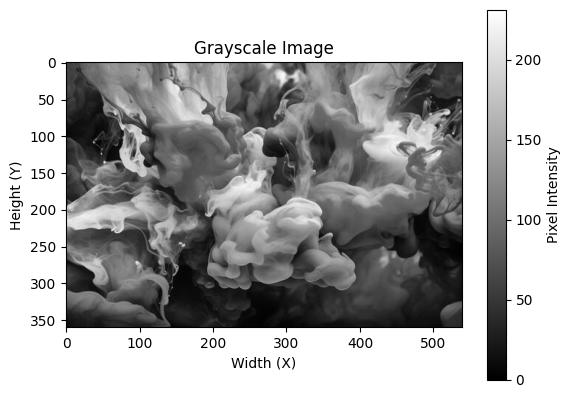

In [43]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.xlabel('Width (X)')
plt.ylabel('Height (Y)')
plt.colorbar(label='Pixel Intensity')
plt.show()